## 深度学习02
用tf构建神经网络

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tkinter

In [2]:
def add_layers(inputs, in_size, out_size, acti_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    print(Wx_plus_b.shape)
    
    if acti_function is None:
        outputs = Wx_plus_b
    else:
        outputs = acti_function(Wx_plus_b)
    return outputs

In [3]:
#下面两行代码是一个意思：增加一维
x_data = np.linspace(-1,1,300)[:,np.newaxis]
# x_data = np.linspace(-1,1,300)[:,None]


In [4]:
x_data.shape

(300, 1)

In [5]:
noise = np.random.normal(loc=0, scale=0.05, size=x_data.shape) #均值，方差，大小-+
y_data = np.square(x_data) - 0.5 + noise

In [6]:
xs = tf.placeholder(tf.float32,[None, 1])
#第一维不设定
ys = tf.placeholder(tf.float32,[None, 1])

#### 建立神经层

In [7]:
l1 = add_layers(xs, 1, 10, tf.nn.relu)
prediction = add_layers(l1, 10, 1, acti_function=None)

Instructions for updating:
Colocations handled automatically by placer.
(?, 10)
(?, 1)


In [8]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                                   reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

Instructions for updating:
Use tf.cast instead.


In [9]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

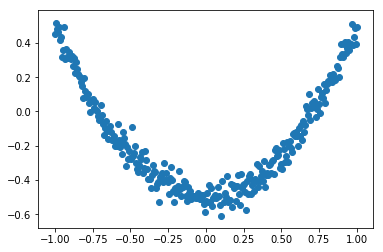

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()#interactive模式，而不是block模式
plt.show()

#训练
for i in range(1000):
    sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
    
    if i % 50 ==0:
#         print(sess.run(loss, feed_dict={xs:x_data, ys:y_data}))
        
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        
        prediction_val = sess.run(prediction, feed_dict={xs:x_data})
        lines = ax.plot(x_data, prediction_val, 'r-', lw=4)
        #绘图过程间断1s进行
        plt.pause(1)

#### 一点零碎小练习

In [11]:
a1 = tf.random_normal((10,1))
a2 = tf.zeros((1,10))

In [12]:
sess = tf.Session()
result = tf.matmul(a1, a2)
print(sess.run(result))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [13]:
np.linspace(1,2,300).shape

(300,)